Свойства газов


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.constants as const
from neftpy.uconst import *

import neftpy.upvt_gas as pvtg
import neftpy.upvt_np_vect as pvt
import neftpy.uconvert as uc

# z фактор

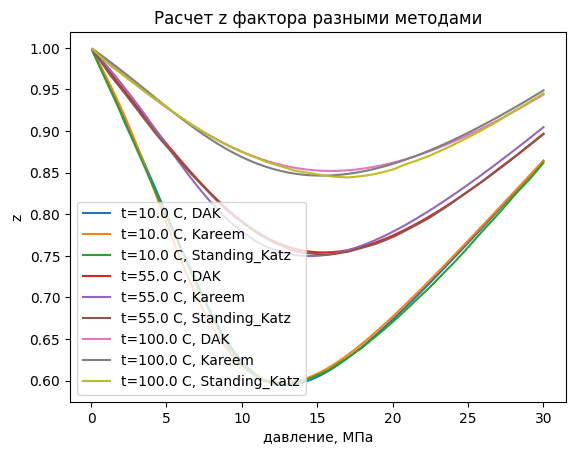

In [6]:
gamma_gas = 0.8 

p_list_MPa = np.linspace(0.1, 30, 100)
t_list_C = np.linspace(10, 100, 3)
t_list_K = uc.C_2_K(t_list_C)
mz = 'DAK'
for t in t_list_K:
    plt.plot(p_list_MPa, pvt.unf_zfactor(p_list_MPa, t, gamma_gas, method_z='DAK'), label=f't={uc.K_2_C(t)} C, DAK')
    plt.plot(p_list_MPa, pvt.unf_zfactor(p_list_MPa, t, gamma_gas, method_z='Kareem'), label=f't={uc.K_2_C(t)} C, Kareem')
    plt.plot(p_list_MPa, pvt.unf_zfactor(p_list_MPa, t, gamma_gas, method_z='Standing_Katz'), label=f't={uc.K_2_C(t)} C, Standing_Katz')
ax = plt.gca()
ax.set(xlabel='давление, МПа', ylabel='z')
plt.title('Расчет z фактора разными методами')
plt.legend()
plt.show()
    

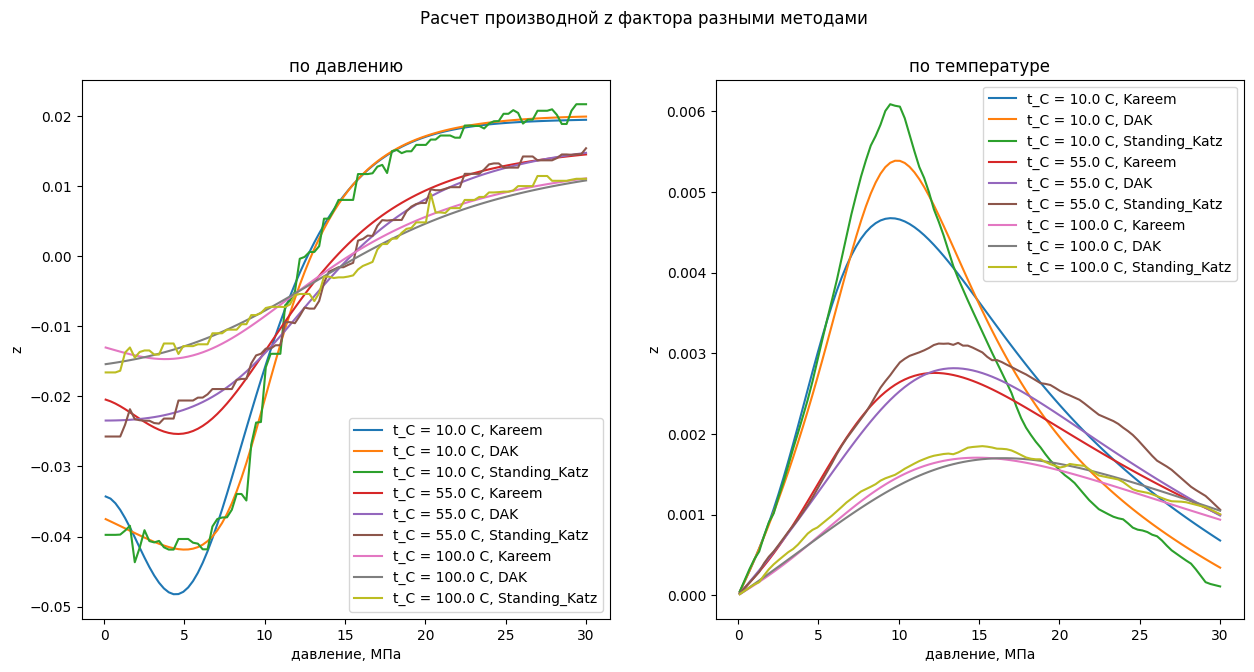

In [7]:
gamma_gas = 0.8 

p_list_MPa = np.linspace(0.1, 30, 100)
t_list_C = np.linspace(10, 100, 3)
t_list_K = uc.C_2_K(t_list_C)

fig, ax = plt.subplots(1, 2, figsize=(15,7))
fig.suptitle('Расчет производной z фактора разными методами')
for t in t_list_K:
    mz = 'Kareem'
    ax[0].plot(p_list_MPa, pvt.unf_dzdp(p_list_MPa, t, gamma_gas, method_z=mz), label=f't_C = {uc.K_2_C(t)} C, Kareem')
    ax[1].plot(p_list_MPa, pvt.unf_dzdt(p_list_MPa, t, gamma_gas, method_z=mz), label=f't_C = {uc.K_2_C(t)} C, Kareem')

    mz = 'DAK'
    ax[0].plot(p_list_MPa, pvt.unf_dzdp(p_list_MPa, t, gamma_gas, method_z=mz), label=f't_C = {uc.K_2_C(t)} C, DAK')
    ax[1].plot(p_list_MPa, pvt.unf_dzdt(p_list_MPa, t, gamma_gas, method_z=mz), label=f't_C = {uc.K_2_C(t)} C, DAK')
    
    mz = 'Standing_Katz'
    ax[0].plot(p_list_MPa, pvt.unf_dzdp(p_list_MPa, t, gamma_gas, method_z=mz), label=f't_C = {uc.K_2_C(t)} C, Standing_Katz')
    ax[1].plot(p_list_MPa, pvt.unf_dzdt(p_list_MPa, t, gamma_gas, method_z=mz), label=f't_C = {uc.K_2_C(t)} C, Standing_Katz')
ax[0].set(xlabel='давление, МПа', ylabel='z', title='по давлению')
ax[1].set(xlabel='давление, МПа', ylabel='z', title='по температуре')
ax[0].legend()
ax[1].legend()
ax[1].legend()
plt.show()

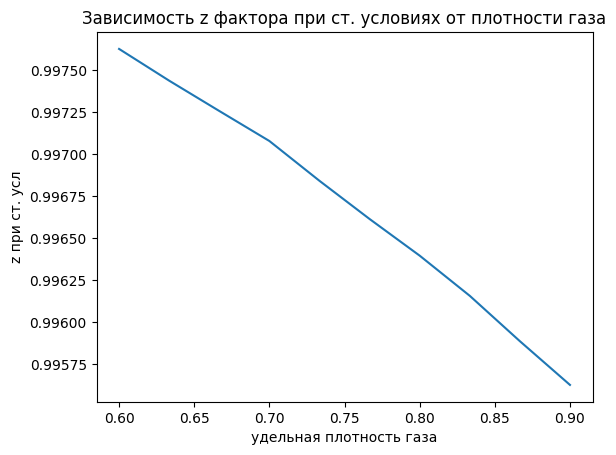

In [8]:
# z фактор при стандартных условиях

gg = np.linspace(0.6, 0.9, 10)

plt.plot(gg, pvt.unf_zfactor(p_MPaa=0.101325, t_K = 293.15, gamma_gas=gg))
plt.title('Зависимость z фактора при ст. условиях от плотности газа')
ax = plt.gca()
ax.set(xlabel='удельная плотность газа', ylabel='z при ст. усл')
plt.show()


# плотность, объемный коэффициент и некоторые формулы

Уравнение состояния реального газа

$$pV = z\frac{m}{M} RT \tag{1}$$

- m - масса, кг
- M - молярная масса кг/моль
- p - давление, Па
- V - объем, м3
- z - коэффициент сверхсжимаемости
- R - газовая постоянная R ≈ 8,314 Дж/(моль⋅К),
- T - температура, К

из него можно получить выражение для плотности газа

$$\rho = \frac{m}{V} = \frac{p M}{zRT} \tag{2}$$

объемный коэффициент газа

$$ B_g = \frac{V_{rc}}{V_{sc}} \tag{3} $$

объем газа при определенных условиях можно выразить как 

$$ V_{p,t} = z\frac{m}{pM} RT$$

тогда


$$ B_g = \frac{V_{rc}}{V_{sc}} = \frac{z_{rc}\dfrac{m}{p_{rc} M} RT_{rc}}{z_{sc}\dfrac{m}{p_{sc}M} RT_{sc}}$$



$$ B_g = \frac{V_{rc}}{V_{sc}} = \frac{z_{rc}p_{sc} T_{rc}}  {z_{sc} p_{rc} T_{sc}} \tag{4}$$


c большой точностью 
- $z_{sc}=1$
- $p_{sc}=1$ атма
- $t_{sc}=293$ K

$$ B_g = \frac{V_{rc}}{V_{sc}} = \frac{z_{rc} T_{rc}}  { p_{rc} 293} \tag{5}$$

Подставив в выражение для плотности (2) объем газа выраженный через объемный коэффициент (3) можно получить


$$\rho = \frac{m}{V_{sc}B_g} = \frac{\rho_{sc}}{B_g} \tag{6}$$

# вязкость газа

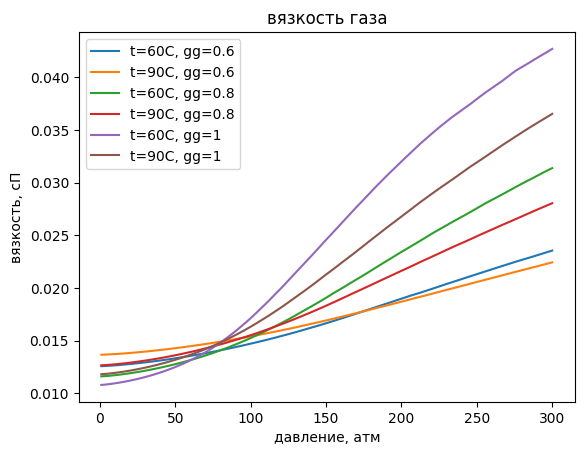

In [9]:
gg = [0.6, 0.8, 1]
plist_atma = np.linspace(1,300, 100)
tlist_C = [60,  90]


for gamma_gas in gg:
    for t in tlist_C:
        plt.plot(plist_atma, 
                 pvt.unf_mu_gas_cP(p_atma=plist_atma,
                                    t_C=t,
                                    gamma_gas=gamma_gas,
                                    ), 
                label = f't={t}C, gg={gamma_gas}'
                )
plt.title('вязкость газа')
ax = plt.gca()
ax.set(xlabel='давление, атм', ylabel='вязкость, сП')
plt.legend()
plt.show()

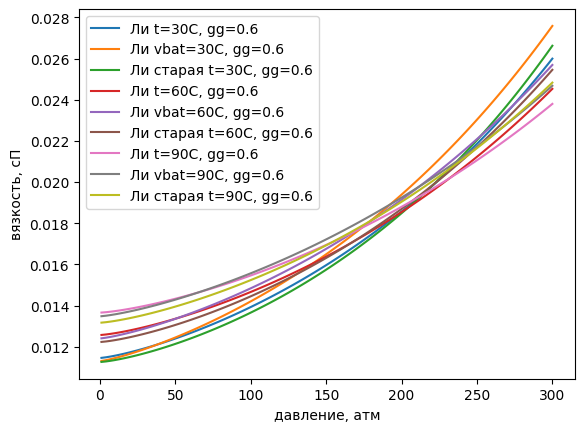

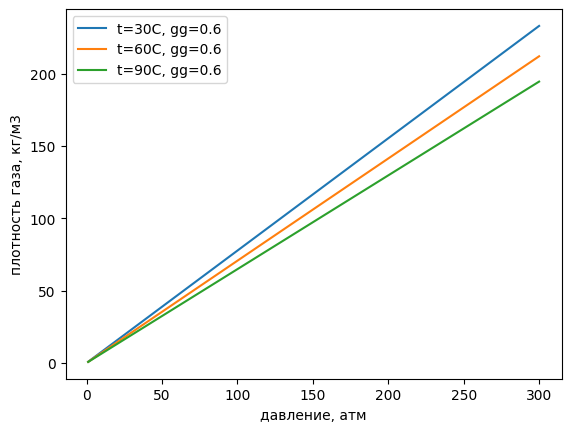

In [10]:
# сравним расчеты вязкости газа с использованием различных реализаций корреляции Ли
gg = [0.6, 0.8, 1]
plist_atma = np.linspace(1,300, 100)
tlist_C = [30, 60, 90]

gamma_gas = gg[0]
for t in tlist_C:
    plt.plot(plist_atma, pvt.unf_mu_gas_Lee_z_cP(uc.atm_2_MPa(plist_atma), uc.C_2_K(t), gamma_gas, 0.9), 
                label = f'Ли t={t}C, gg={gamma_gas}')
    plt.plot(plist_atma, pvt.unf_mu_gas_Lee_z_cP_(uc.atm_2_MPa(plist_atma), uc.C_2_K(t), gamma_gas, 0.9), 
                label = f'Ли vbat={t}C, gg={gamma_gas}')
    plt.plot(plist_atma, pvt.unf_mu_gas_Lee_rho_cP( uc.C_2_K(t), gamma_gas,
                                                     pvt.unf_rho_gas_z_kgm3(uc.atm_2_MPa(plist_atma), uc.C_2_K(t), gamma_gas, 0.9)
                                                     ), 
                label = f'Ли старая t={t}C, gg={gamma_gas}'
            )
ax = plt.gca()
ax.set(xlabel='давление, атм', ylabel='вязкость, сП')
plt.legend()
plt.show()


for t in tlist_C:
    plt.plot(plist_atma, pvt.unf_rho_gas_z_kgm3(uc.atm_2_MPa(plist_atma), uc.C_2_K(t), gamma_gas, 0.9), 
                label = f't={t}C, gg={gamma_gas}')
ax = plt.gca()
ax.set(xlabel='давление, атм', ylabel='плотность газа, кг/м3')
plt.legend()
plt.show()

# теплофизические свойства газа

Показатель адиабаты (иногда называемый коэффициентом Пуассона) — отношение теплоёмкости при постоянном давлении ( $C_P$ ) к теплоёмкости при постоянном объёме ( $C_V$). Иногда его ещё называют фактором изоэнтропийного расширения. Обозначается греческой буквой $\kappa$ (каппа). 

$$\kappa = \frac{C_P}{C_V} = \frac{c_P}{c_V} $$

- $C$ - теплоемкость газа
- $c$ - удельная теплоемкость газа (отношение теплоемкости к единице массы газа)

индексы $_P$, $_V$ - обозначают условия постоянства давления и постоянства объема, соответственно.
[Показатель адиабаты](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D1%8C_%D0%B0%D0%B4%D0%B8%D0%B0%D0%B1%D0%B0%D1%82%D1%8B)

$$C_V = C_P - \nu R$$

- $\nu$ - количество вещества в молях
- R - газовая постоянная



In [11]:
pvt.unf_heat_capacity_gas_Mahmood_Moshfeghian_JkgC(1,300,0.8)

np.float64(2350.03831205727)

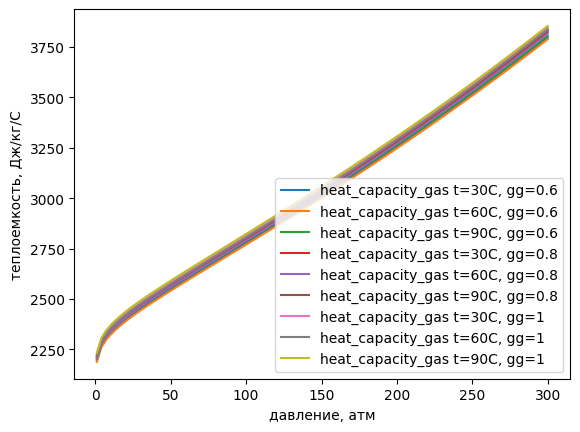

In [12]:
# сравним расчеты вязкости газа с использованием различных реализаций корреляции Ли
gg = [0.6, 0.8, 1]
plist_atma = np.linspace(1,300, 100)
tlist_C = [30, 60, 90]

for gamma_gas in gg:
    for t in tlist_C:
        plt.plot(plist_atma, pvt.unf_heat_capacity_gas_Mahmood_Moshfeghian_JkgC(uc.atm_2_MPa(plist_atma), uc.C_2_K(t), gamma_gas), 
                    label = f'heat_capacity_gas t={t}C, gg={gamma_gas}')
            
ax = plt.gca()
ax.set(xlabel='давление, атм', ylabel='теплоемкость, Дж/кг/С')
plt.legend()
plt.show()

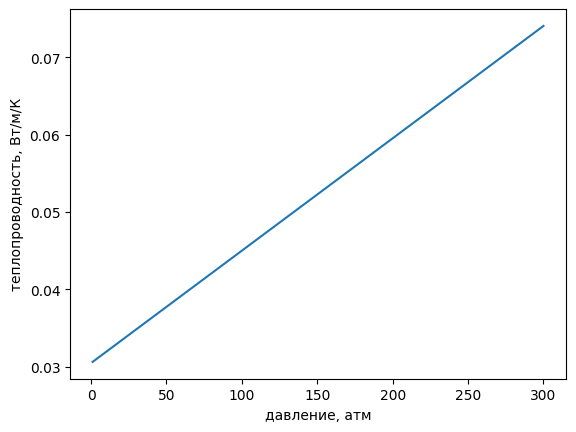

In [13]:
# сравним расчеты вязкости газа с использованием различных реализаций корреляции Ли

tlist_C = np.linspace(1,300, 100)


plt.plot(tlist_C, pvt.unf_thermal_conductivity_gas_methane_WmK(tlist_C))
            
ax = plt.gca()
ax.set(xlabel='давление, атм', ylabel='теплопроводность, Вт/м/К')

plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
C:\Users\rnt\AppData\Local\Temp\ipykernel_16888\1101731227.py:9: SyntaxWarning: invalid escape sequence '\g'
  label = f'$\gamma_{{gas}} = {gamma_gas}$')


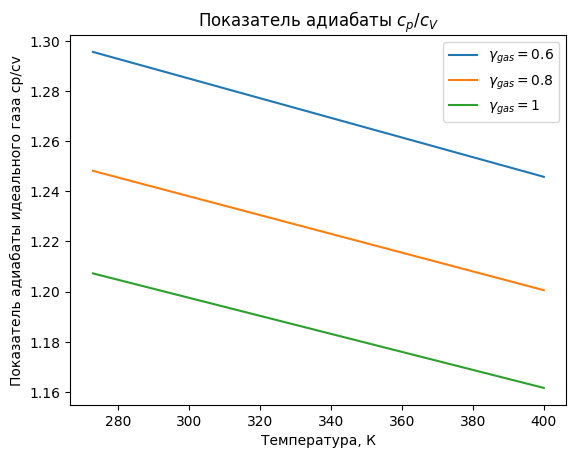

In [14]:
gg = [0.6, 0.8, 1]


tlist_K = np.linspace(273,400, 100)

for gamma_gas in gg:
    plt.plot(tlist_K, 
             pvt.unf_gas_ideal_heat_capacity_ratio(gamma_gas, tlist_K),
             label = f'$\gamma_{{gas}} = {gamma_gas}$')
            
ax = plt.gca()
ax.set(xlabel='Температура, К', ylabel='Показатель адиабаты идеального газа cp/cv', title = 'Показатель адиабаты $c_p/c_V$ ')
plt.legend()
plt.show()

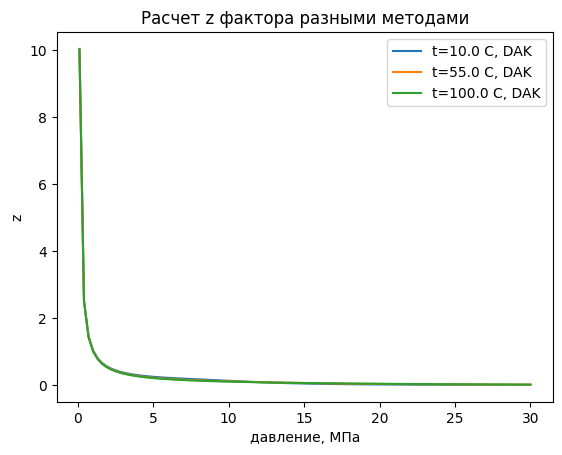

In [15]:
gamma_gas = 0.8 

p_list_MPa = np.linspace(0.1, 30, 100)
t_list_C = np.linspace(10, 100, 3)
t_list_K = uc.C_2_K(t_list_C)
mz = 'DAK'
for t in t_list_K:
    plt.plot(p_list_MPa, pvt.unf_gas_isotermal_compressibility_1MPa(p_list_MPa, t, gamma_gas, method_z='DAK'), label=f't={uc.K_2_C(t)} C, DAK')
    #plt.plot(p_list_MPa, pvt.unf_gas_thermal_expansion_1K(p_list_MPa, t, gamma_gas, method_z='Kareem'), label=f't={uc.K_2_C(t)} C, Kareem')
    #plt.plot(p_list_MPa, pvt.unf_zfactor(p_list_MPa, t, gamma_gas, method_z='Standing_Katz'), label=f't={uc.K_2_C(t)} C, Standing_Katz')
ax = plt.gca()
ax.set(xlabel='давление, МПа', ylabel='z')
plt.title('Расчет z фактора разными методами')
plt.legend()
plt.show()

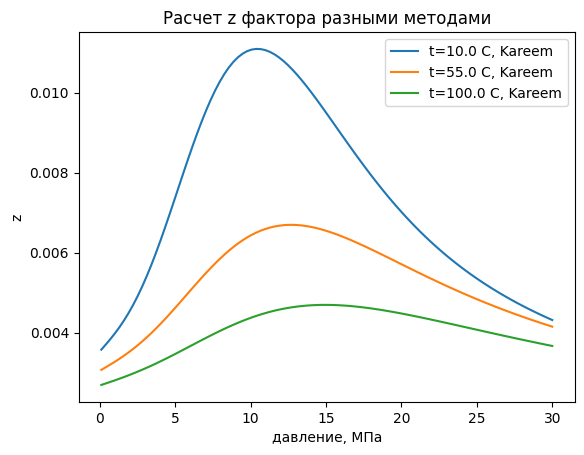

In [16]:
gamma_gas = 0.8 

p_list_MPa = np.linspace(0.1, 30, 100)
t_list_C = np.linspace(10, 100, 3)
t_list_K = uc.C_2_K(t_list_C)
mz = 'DAK'
for t in t_list_K:
    #plt.plot(p_list_MPa, pvt.unf_gas_isotermal_compressibility_1MPa(p_list_MPa, t, gamma_gas, method_z='DAK'), label=f't={uc.K_2_C(t)} C, DAK')
    plt.plot(p_list_MPa, pvt.unf_gas_thermal_expansion_1K(p_list_MPa, t, gamma_gas, method_z='Kareem'), label=f't={uc.K_2_C(t)} C, Kareem')
    #plt.plot(p_list_MPa, pvt.unf_zfactor(p_list_MPa, t, gamma_gas, method_z='Standing_Katz'), label=f't={uc.K_2_C(t)} C, Standing_Katz')
ax = plt.gca()
ax.set(xlabel='давление, МПа', ylabel='z')
plt.title('Расчет z фактора разными методами')
plt.legend()
plt.show()

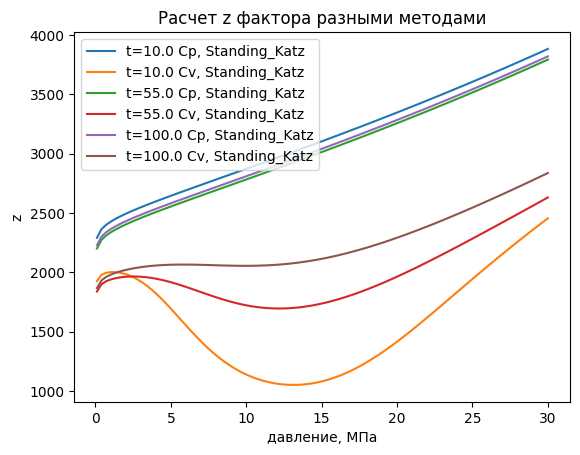

In [17]:
gamma_gas = 0.8 

p_list_MPa = np.linspace(0.1, 30, 100)
t_list_C = np.linspace(10, 100, 3)
t_list_K = uc.C_2_K(t_list_C)
mz = 'DAK'
for t in t_list_K:
    #plt.plot(p_list_MPa, pvt.unf_gas_isotermal_compressibility_1MPa(p_list_MPa, t, gamma_gas, method_z='DAK'), label=f't={uc.K_2_C(t)} C, DAK')
    #plt.plot(p_list_MPa, pvt.unf_gas_thermal_expansion_1K(p_list_MPa, t, gamma_gas, method_z='Kareem'), label=f't={uc.K_2_C(t)} C, Kareem')
    plt.plot(p_list_MPa, pvt.unf_cp_gas_JkgC(p_list_MPa, t, gamma_gas), label=f't={uc.K_2_C(t)} Cp, Standing_Katz')
    plt.plot(p_list_MPa, pvt.unf_cv_gas_JkgC(p_list_MPa, t, gamma_gas, method_z='Kareem'), label=f't={uc.K_2_C(t)} Cv, Standing_Katz')
ax = plt.gca()
ax.set(xlabel='давление, МПа', ylabel='z')
plt.title('Расчет z фактора разными методами')
plt.legend()
plt.show()

# некоторые проверочные расчеты


$$\rho = \frac{m}{V} = \frac{p M}{zRT} \tag{2}$$